In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import numpy as np
group4_lux = pd.read_csv(r'C:\Users\user\Documents\group4_lux.csv')
group4_temp = pd.read_csv(r'C:\Users\user\Documents\group4_temp.csv')
group4_lux.info()
group4_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   result        0 non-null      float64
 2   table         432 non-null    int64  
 3   _start        432 non-null    object 
 4   _stop         432 non-null    object 
 5   _time         432 non-null    object 
 6   _value        376 non-null    float64
 7   _field        432 non-null    object 
 8   _measurement  432 non-null    object 
 9   device_id     432 non-null    object 
 10  orig_adapter  432 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 25.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   result        0 non-null      floa

In [2]:
group4_lux_1 = group4_lux.loc[:,["_time", "_value"]]
group4_temp_1 = group4_temp.loc[:,["_time", "_value"]]
group4_lux_1.info()
group4_temp_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _time   432 non-null    object 
 1   _value  376 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   _time   432 non-null    object 
 1   _value  376 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.1+ KB


In [3]:
DataFramegroup4 = pd.merge(group4_lux_1, group4_temp_1, on="_time")
DataFramegroup4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432 entries, 0 to 431
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _time     432 non-null    object 
 1   _value_x  376 non-null    float64
 2   _value_y  376 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


In [4]:
DataFramegroup4.rename(columns={"_time" : "Time", 
                               "_value_x" : "Light Intensity", 
                               "_value_y" : "Temperature"}, inplace=True)
DataFramegroup4['Time'] = pd.to_datetime(DataFramegroup4['Time'])
DataFramegroup4.set_index('Time', inplace=True)
DataFramegroup4_1 = DataFramegroup4.tz_convert("Asia/Jakarta")
DataFramegroup4_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 432 entries, 2021-10-14 00:10:00+07:00 to 2021-10-17 00:00:00+07:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Light Intensity  376 non-null    float64
 1   Temperature      376 non-null    float64
dtypes: float64(2)
memory usage: 10.1 KB


<AxesSubplot:ylabel='Frequency'>

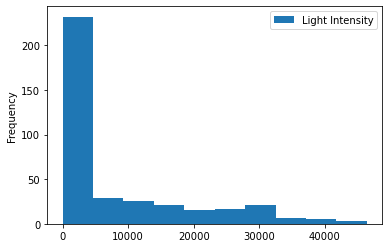

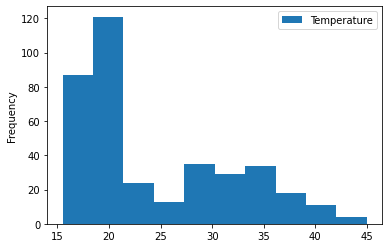

In [5]:
DataFramegroup4_1.plot.hist(x='Temperature')
DataFramegroup4_1.plot.hist(x='Light Intensity')

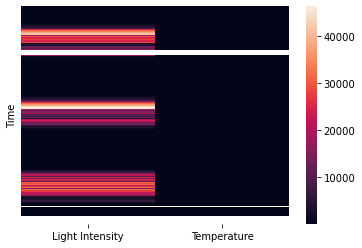

In [6]:
heatmapgroup4 = sns.heatmap(DataFramegroup4_1,yticklabels=False)

<AxesSubplot:xlabel='Time'>

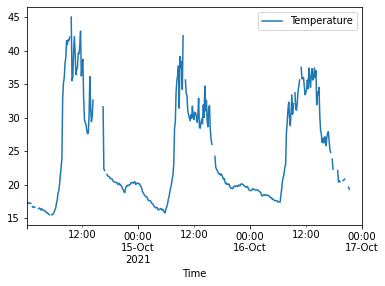

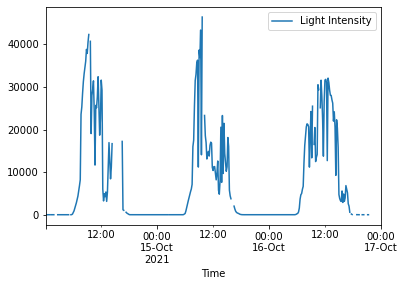

In [7]:
DataFramegroup4_1.plot.line(y='Temperature')
DataFramegroup4_1.plot.line(y='Light Intensity')

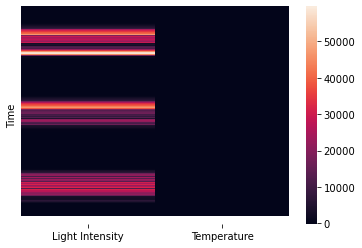

In [8]:
DataFramegroup4_2 = DataFramegroup4_1.interpolate("quadratic")
heatmapgroup4 = sns.heatmap(DataFramegroup4_2, yticklabels=False)

Light Intensity       AxesSubplot(0.125,0.125;0.352273x0.755)
Temperature        AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

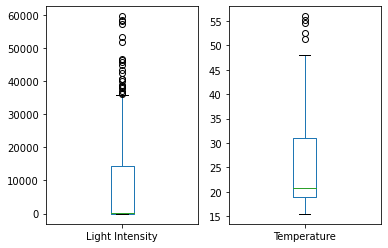

In [9]:
DataFramegroup4_2.plot.box(subplots=True)

In [10]:
Q1 = DataFramegroup4_2.quantile(0.25)
Q3 = DataFramegroup4_2.quantile(0.75)
IQR = Q3-Q1
Q1, Q3, IQR

(Light Intensity     0.416667
 Temperature        18.900000
 Name: 0.25, dtype: float64,
 Light Intensity    14264.165
 Temperature           31.000
 Name: 0.75, dtype: float64,
 Light Intensity    14263.748333
 Temperature           12.100000
 dtype: float64)

In [11]:
DataFramegroup4_2["Light Intensity"] = np.where(DataFramegroup4_2["Light Intensity"] < Q1["Light Intensity"]- IQR["Light Intensity"]*1.5, Q1["Light Intensity"], DataFramegroup4_2["Light Intensity"])
DataFramegroup4_2["Temperature"] = np.where(DataFramegroup4_2["Temperature"] < Q1["Temperature"]- IQR["Temperature"]*1.5, Q1["Temperature"], DataFramegroup4_2["Temperature"])

DataFramegroup4_2["Light Intensity"] = np.where(DataFramegroup4_2["Light Intensity"] > Q3["Light Intensity"] + IQR["Light Intensity"]*1.5, Q3["Light Intensity"], DataFramegroup4_2["Light Intensity"])
DataFramegroup4_2["Temperature"] = np.where(DataFramegroup4_2["Temperature"] > Q3["Temperature"] + IQR["Temperature"]*1.5, Q3["Temperature"], DataFramegroup4_2["Temperature"])

DataFramegroup4_2.describe()

,Light Intensity,Temperature
count,415.000000,415.000000
mean,7057.725378,24.733234
std,9915.016627,7.823721
min,-87.973897,15.466893
25%,0.416667,18.900000
50%,275.000000,20.766625
75%,14205.832500,31.000000
max,35655.830000,47.918549


Light Intensity       AxesSubplot(0.125,0.125;0.352273x0.755)
Temperature        AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

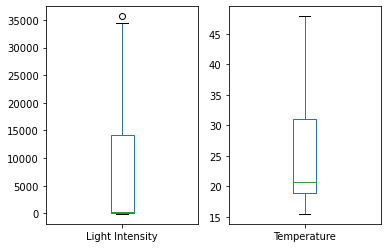

In [12]:
DataFramegroup4_2.plot.box(subplots=True)


In [13]:
Q1 = DataFramegroup4_2.quantile(0.25)
Q3 = DataFramegroup4_2.quantile(0.75)
IQR = Q3-Q1
Q1, Q3, IQR

(Light Intensity     0.416667
 Temperature        18.900000
 Name: 0.25, dtype: float64,
 Light Intensity    14205.8325
 Temperature           31.0000
 Name: 0.75, dtype: float64,
 Light Intensity    14205.415833
 Temperature           12.100000
 dtype: float64)

In [14]:
DataFramegroup4_2["Light Intensity"] = np.where(DataFramegroup4_2["Light Intensity"] < Q1["Light Intensity"]- IQR["Light Intensity"]*1.5, Q1["Light Intensity"], DataFramegroup4_2["Light Intensity"])
DataFramegroup4_2["Temperature"] = np.where(DataFramegroup4_2["Temperature"] < Q1["Temperature"]- IQR["Temperature"]*1.5, Q1["Temperature"], DataFramegroup4_2["Temperature"])

DataFramegroup4_2["Light Intensity"] = np.where(DataFramegroup4_2["Light Intensity"] > Q3["Light Intensity"] + IQR["Light Intensity"]*1.5, Q3["Light Intensity"], DataFramegroup4_2["Light Intensity"])
DataFramegroup4_2["Temperature"] = np.where(DataFramegroup4_2["Temperature"] > Q3["Temperature"] + IQR["Temperature"]*1.5, Q3["Temperature"], DataFramegroup4_2["Temperature"])

DataFramegroup4_2.describe()

,Light Intensity,Temperature
count,415.000000,415.000000
mean,7006.038637,24.733234
std,9821.039087,7.823721
min,-87.973897,15.466893
25%,0.416667,18.900000
50%,275.000000,20.766625
75%,14176.666250,31.000000
max,34470.000000,47.918549


Light Intensity       AxesSubplot(0.125,0.125;0.352273x0.755)
Temperature        AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

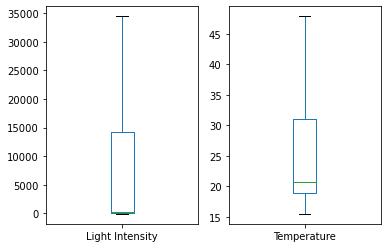

In [15]:
DataFramegroup4_2.plot.box(subplots=True)

,Light Intensity,Temperature
Time,,
2021-10-14 00:10:00+07:00,NaN,NaN
2021-10-14 00:20:00+07:00,0.416667,17.3
2021-10-14 00:30:00+07:00,0.416667,17.2
2021-10-14 00:40:00+07:00,0.416667,17.3
2021-10-14 00:50:00+07:00,0.416667,17.2
...,...,...
2021-10-16 23:20:00+07:00,NaN,NaN
2021-10-16 23:30:00+07:00,NaN,NaN
2021-10-16 23:40:00+07:00,NaN,NaN


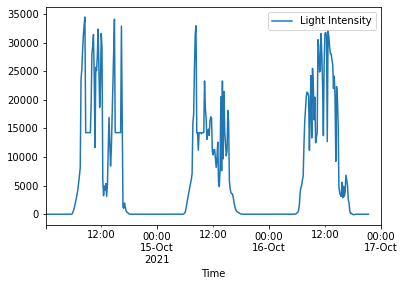

In [26]:
DataFramegroup4_2.groupby(DataFramegroup4_2.index.hour)
DataFramegroup4_2.plot.line(y='Light Intensity')
DataFramegroup4_2

<AxesSubplot:xlabel='Time'>

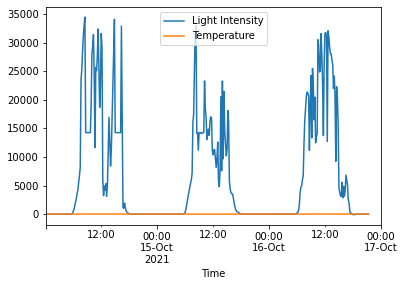

In [17]:
DataFramegroup4_2.plot.line()

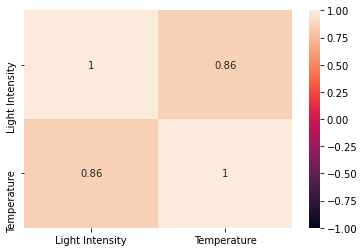

In [17]:
heatmapgroup4 = sns.heatmap(DataFramegroup4_2.corr(), vmin=-1, vmax=1, annot = True)

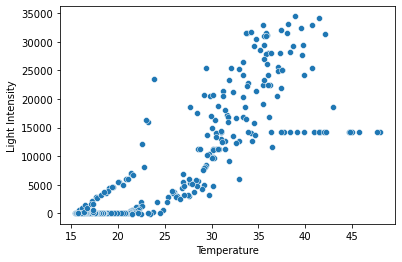

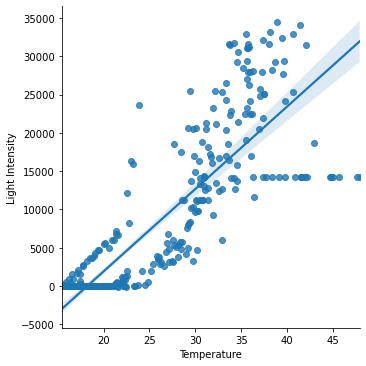

In [18]:
scatterplotgroup4_2 = sns.scatterplot(x="Temperature", y="Light Intensity", data = DataFramegroup4_2)
scatterplotgroup4_3 = sns.lmplot(x="Temperature", y="Light Intensity", data = DataFramegroup4_2)

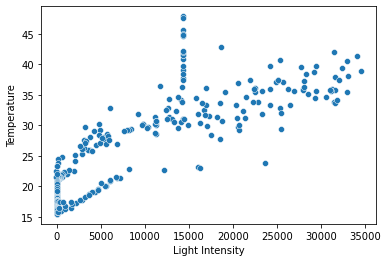

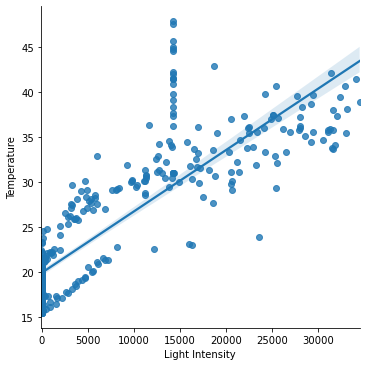

In [19]:
scatterplotgroup4_2 = sns.scatterplot(y="Temperature", x="Light Intensity", data = DataFramegroup4_2)
scatterplotgroup4_3 = sns.lmplot(y="Temperature", x="Light Intensity", data = DataFramegroup4_2)
